#**MNIST Handwritten Digit Classification using Deep Learning (Neural Network)**

#**Install the necessary Libraries**

In [74]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
tor

#**Import the Libraries**

In [75]:
# Importing the Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow import keras
import tensorflow_datasets as mnist
from tensorflow.keras.models import load_model
from tensorflow.math import confusion_matrix
import gradio as gr

#**Data Collection and Preprocessing**



**Loading the MNIST Data from keras datasets**

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
type(X_train)

numpy.ndarray

In [4]:
# Shape of the numpy arrays
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training Data ---> 60,000 Images

Test Data    ---> 10,000 Images

Image Dimension  ---> 28 * 28

Grayscale Image ---> 1 channel(Black and White)

In [5]:
# Print the 20th image
print(X_train[20])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38
  190  25   0   0   0   0   0   0   0   0]
 [  0   0   0  13  25  10   0   0   0   0   0   0   0   0   0   0   0 112
  252 125   4   0   0   0   0   0   0   0]
 [  0   0   0 132 252 113   0   0   0   0   0   0   0   0   0   0   0  61
  252 252  36   0   0   0   0   0   0   0]
 [  0   0   0 132 252 240  79   0   0   0   0   0   0   0   0   0   0  84
  252 252  36   0   0   0   0   0   0   0]
 [  0   0   0 132 252 252 238  52   0   0   0   0   0   0   0   

In [6]:
# print the 20th label
print(y_train[20])

4


In [7]:
print(X_train[20].shape)

(28, 28)


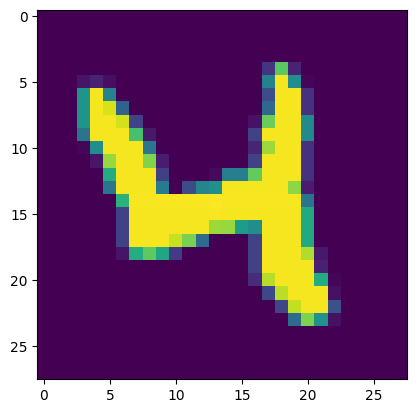

4


In [8]:
# Display the Image
plt.imshow(X_train[20])
plt.show()

# Print the Corresponding label
print(y_train[20])

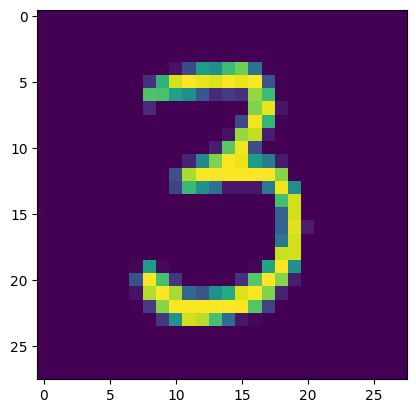

3


In [9]:
# Display the Image
plt.imshow(X_train[50])
plt.show()

# Print the Corresponding label
print(y_train[50])

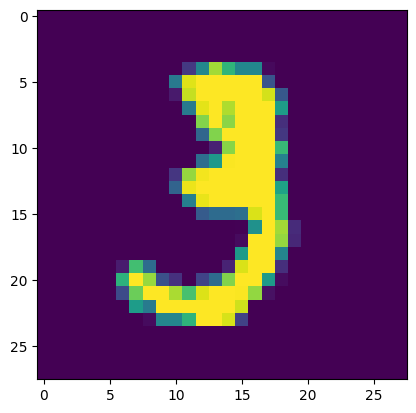

3


In [10]:
# Display the Image
plt.imshow(X_train[10])
plt.show()

# Print the Corresponding label
print(y_train[10])

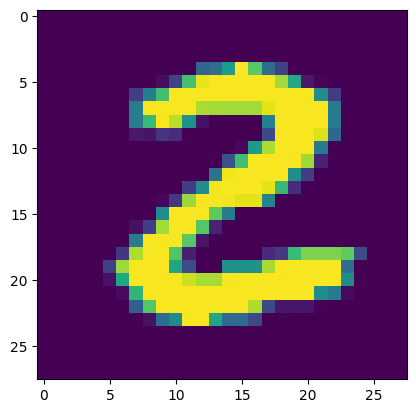

2


In [11]:
# Display the Image
plt.imshow(X_train[25])
plt.show()

# Print the Corresponding label
print(y_train[25])

**Image Labels**

In [12]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [13]:
# Unique values in Y_train
print("\nUnique values in Y_train:")
print(np.unique(y_train))

# Unique values in Y_test
print("\nUnique values in Y_test:")
print(np.unique(y_test))


Unique values in Y_train:
[0 1 2 3 4 5 6 7 8 9]

Unique values in Y_test:
[0 1 2 3 4 5 6 7 8 9]


**We can use these labels as such or perform One Hot Encoding**

**There is no need for dimensioning because all images have common dimension**

In [14]:
# Normalization (Scaling the values to be in range of 0 - 1)
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

In [15]:
# Print the 20th image
print(X_train_norm[20])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

#**Building the Neural Network**

In [16]:
# Setting the layers of the Neural Network
model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
# Compling the Neural Network
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# Training the Neural Network
model_1.fit(X_train_norm, y_train, epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8748 - loss: 0.4410
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9642 - loss: 0.1262
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9752 - loss: 0.0828
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9826 - loss: 0.0591
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9876 - loss: 0.0435
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9910 - loss: 0.0328
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9933 - loss: 0.0251
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9953 - loss: 0.0187
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9957 - loss: 0.0160
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9966 - loss: 0.0134
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9973 - loss: 0.0107
Epoch 12/15
1875/1875 ━

**Training data accuracy : 99.8%**

**Accuracy on Test Data**

In [20]:
# Accuracy on Test Data
loss, accuracy = model_1.evaluate(X_test_norm, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9666 - loss: 0.1485
Test Loss: 0.12639696896076202
Test Accuracy: 0.9718999862670898


**Test data accuracy : 97.8%**

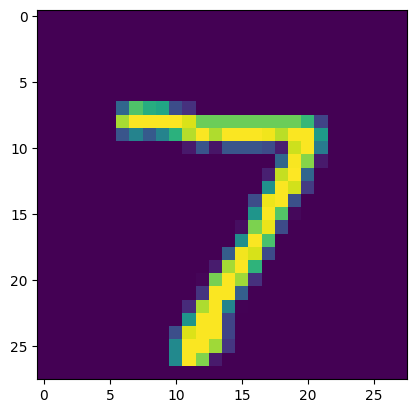

In [21]:
# First data point in X_test
plt.imshow(X_test[0])
plt.show()

In [22]:
print(y_test[0])

7


In [23]:
y_pred_1 = model_1.predict(X_test_norm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [24]:
print(y_pred_1.shape)

(10000, 10)


In [25]:
print(y_pred_1[0])

[4.2145696e-15 3.5316642e-14 1.4761288e-09 1.4584663e-06 9.7687626e-20
 3.7324217e-11 1.3532899e-22 9.9999851e-01 1.2826414e-10 2.9994427e-09]


In [26]:
print(y_pred_1)

[[4.21456955e-15 3.53166423e-14 1.47612877e-09 ... 9.99998510e-01
  1.28264135e-10 2.99944269e-09]
 [8.71557560e-22 5.51252403e-13 9.99999940e-01 ... 7.68542109e-31
  5.93327091e-13 8.06714203e-22]
 [1.68140554e-11 9.99578059e-01 7.84230178e-06 ... 2.66592997e-06
  4.11048939e-04 1.10329065e-10]
 ...
 [1.00787738e-19 2.72666902e-14 1.68185896e-14 ... 3.82347380e-08
  1.75314611e-07 9.53683684e-06]
 [1.93475647e-21 1.59676397e-23 2.83941312e-24 ... 2.00314632e-19
  5.29853317e-09 3.67035850e-22]
 [1.78869205e-17 4.81221768e-25 1.20707125e-17 ... 1.66225149e-26
  1.12308420e-20 2.29985472e-18]]


**Model.predict() gives the prediction probability of each classes for that point**

In [27]:
# Converting the prediction probabilities to class label
y_pred_labels_for_first_image = np.argmax(y_pred_1[0])
print(y_pred_labels_for_first_image)

7


In [28]:
# Converting the prediction probabilities to class label for all class label
y_pred_labels = [np.argmax(i) for i in y_pred_1]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 9, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 8, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

**y_test ---> True Labels**

**y_pred_labels ---> Predicted Labels**

In [29]:
conf_mat = confusion_matrix(y_test, y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 961    0    1    0    1    2    9    2    3    1]
 [   0 1111    4    2    0    0    2    1   15    0]
 [   3    1 1001    3    0    0    2    6   15    1]
 [   0    0    4  990    0    4    0    1    7    4]
 [   0    0    5    0  930    1    4    2    6   34]
 [   2    0    1   13    1  865    1    1    7    1]
 [   0    2    3    1    6    7  938    0    1    0]
 [   1    4   12    8    1    1    0  978    6   17]
 [   1    0    2    2    0    0    2    2  963    2]
 [   3    2    1    4    2    3    1    3    8  982]], shape=(10, 10), dtype=int32)


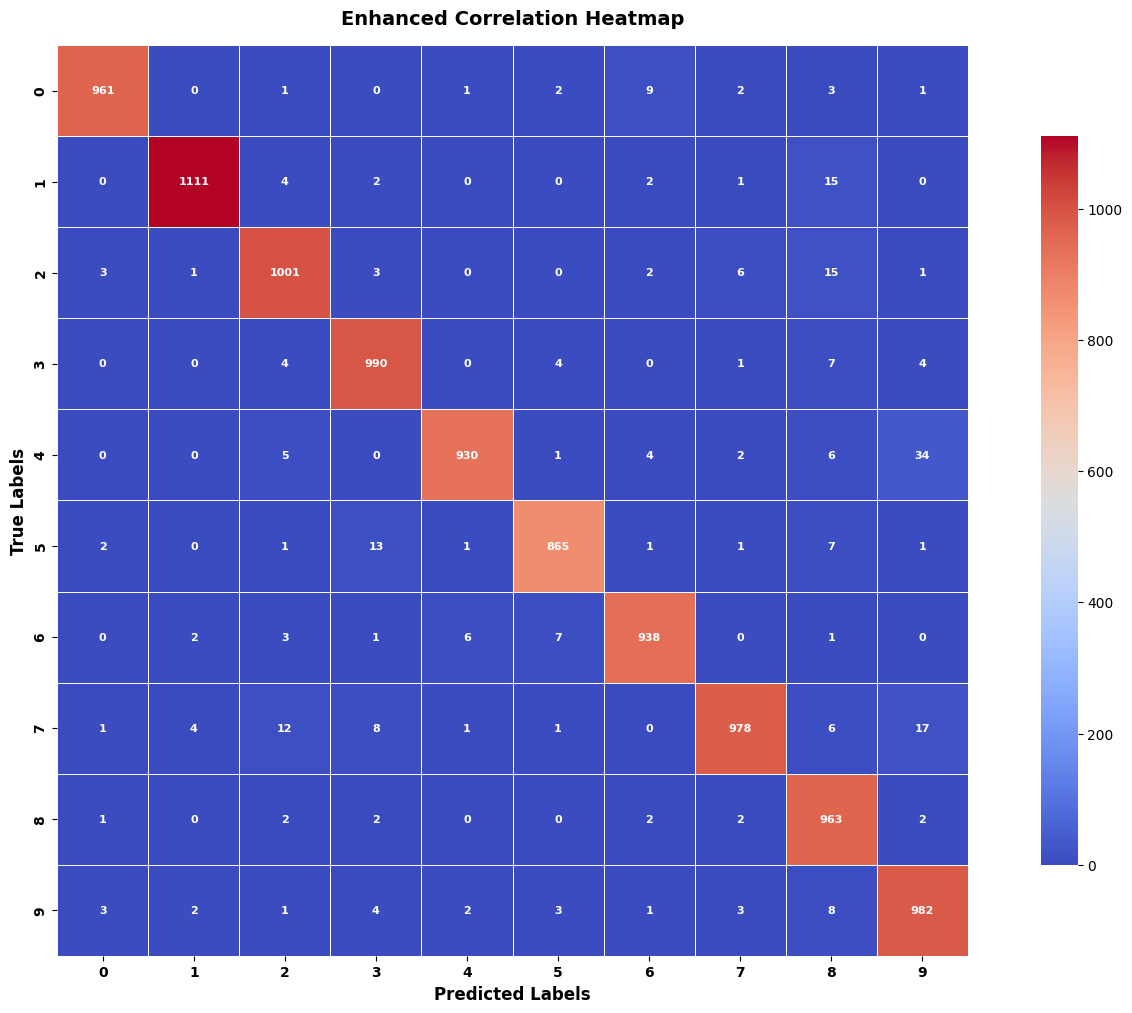

In [30]:
# Create the heatmap with enhancements
plt.figure(figsize=(15, 10))
sns.heatmap(
    conf_mat,
    annot=True,
    fmt="d",  # integers
    cmap="coolwarm",
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    square=True,
    annot_kws={"size": 8, "weight": "bold"},
)
plt.title("Enhanced Correlation Heatmap", fontsize=14, fontweight="bold", pad=15)
plt.xticks(fontsize=10, weight="bold")
plt.yticks(fontsize=10, weight="bold")
plt.tight_layout()
plt.ylabel("True Labels", fontsize=12, fontweight="bold")
plt.xlabel("Predicted Labels", fontsize=12, fontweight="bold")
plt.show()

#**Building a Predictive System**

In [31]:
input_img_path = "MNIST_digit.png"

input_img = cv2.imread(input_img_path)

In [32]:
type(input_img)

numpy.ndarray

In [33]:
print(input_img.shape)

(224, 225, 3)


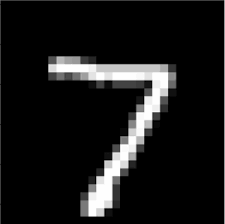

In [34]:
cv2_imshow(input_img)

In [35]:
# Converting to Grayscale image
input_img_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

In [36]:
print(input_img_gray.shape)

(224, 225)


In [37]:
# Resizing the image
input_img_gray_resize = cv2.resize(input_img_gray, (28, 28))

In [38]:
print(input_img_gray_resize.shape)

(28, 28)


In [39]:
cv2_imshow(input_img_gray_resize)

In [40]:
# Normalization (Scaling the values to be in range of 0 - 1)
input_img_gray_resize_norm = input_img_gray_resize / 255.0

In [41]:
type(input_img_gray_resize_norm)

numpy.ndarray

In [42]:
# Reshaping the image
input_img_gray_resize_norm_reshaped = np.reshape(input_img_gray_resize_norm, [1, 28, 28])

In [43]:
type(input_img_gray_resize_norm_reshaped)

numpy.ndarray

In [44]:
input_img_gray_resize_norm_reshaped.shape

(1, 28, 28)

In [45]:
input_pred = model_1.predict(input_img_gray_resize_norm_reshaped)
print(input_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[4.0832185e-15 3.6122855e-14 1.4356937e-09 1.5225266e-06 1.0845049e-19
  3.5956221e-11 1.2236547e-22 9.9999845e-01 1.2585767e-10 3.4601226e-09]]


In [46]:
input_pred_label = np.argmax(input_pred)
print(input_pred_label)

7


#**Predictive System**

Enter the image path: /content/MNIST_digit.png


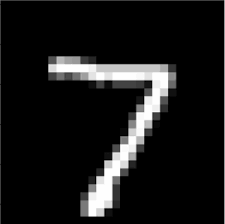

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
The Handwritten Image is Recognised as:  7


In [47]:
# Enter the path of Image
input_img_path = input("Enter the image path: ")

# Read the image entered
input_img = cv2.imread(input_img_path)

# Display the Image
cv2_imshow(input_img)

# Converting to Grayscale image
input_img_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

# Resizing the image
input_img_gray_resize = cv2.resize(input_img_gray, (28, 28))

# Normalization (Scaling the values to be in range of 0 - 1)
input_img_gray_resize_norm = input_img_gray_resize / 255.0

# Reshaping the image
input_img_gray_resize_norm_reshaped = np.reshape(input_img_gray_resize_norm, [1, 28, 28])

# Predicting the Image
input_pred = model_1.predict(input_img_gray_resize_norm_reshaped)

# Choosing the maximum value
input_pred_label = np.argmax(input_pred)
print("The Handwritten Image is Recognised as: ", input_pred_label)

Enter the image path: /content/MNIST_digit(5).jfif


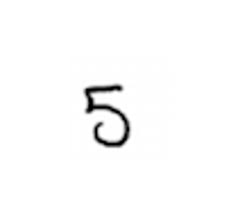

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
The Handwritten Image is Recognised as:  5


In [48]:
# Enter the path of Image
input_img_path = input("Enter the image path: ")

# Read the image entered
input_img = cv2.imread(input_img_path)

# Display the Image
cv2_imshow(input_img)

# Converting to Grayscale image
input_img_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

# Resizing the image
input_img_gray_resize = cv2.resize(input_img_gray, (28, 28))

# Normalization (Scaling the values to be in range of 0 - 1)
input_img_gray_resize_norm = input_img_gray_resize / 255.0

# Reshaping the image
input_img_gray_resize_norm_reshaped = np.reshape(input_img_gray_resize_norm, [1, 28, 28])

# Predicting the Image
input_pred = model_1.predict(input_img_gray_resize_norm_reshaped)

# Choosing the maximum value
input_pred_label = np.argmax(input_pred)
print("The Handwritten Image is Recognised as: ", input_pred_label)

Enter the image path: /content/MNIST_digit(six).jfif


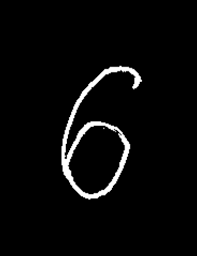

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
The Handwritten Image is Recognised as:  5


In [54]:
# Enter the path of Image
input_img_path = input("Enter the image path: ")

# Read the image entered
input_img = cv2.imread(input_img_path)

# Display the Image
cv2_imshow(input_img)

# Converting to Grayscale image
input_img_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

# Resizing the image
input_img_gray_resize = cv2.resize(input_img_gray, (28, 28))

# Normalization (Scaling the values to be in range of 0 - 1)
input_img_gray_resize_norm = input_img_gray_resize / 255.0

# Reshaping the image
input_img_gray_resize_norm_reshaped = np.reshape(input_img_gray_resize_norm, [1, 28, 28])

# Predicting the Image
input_pred = model_1.predict(input_img_gray_resize_norm_reshaped)

# Choosing the maximum value
input_pred_label = np.argmax(input_pred)
print("The Handwritten Image is Recognised as: ", input_pred_label)

#**Building another model**

In [55]:
# Setting the layers of the Neural Network
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(75, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [59]:
# Compling the Neural Network
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [60]:
# Training the Neural Network
model_2.fit(X_train_norm, y_train, epochs=25)

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8503 - loss: 0.5225
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9570 - loss: 0.1474
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9677 - loss: 0.1036
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9750 - loss: 0.0808
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9803 - loss: 0.0656
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9839 - loss: 0.0546
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9855 - loss: 0.0481
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9879 - loss: 0.0399
Epoch 9/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9898 - loss: 0.0342
Epoch 10/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9899 - loss: 0.0305
Epoch 11/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9915 - loss: 0.0268
Epoch 12/25
1875/1875 ━━━━━━━━

**Training data accuracy : 99.5%**

**Accuracy on Test Data**

In [61]:
# Accuracy on Test Data
loss, accuracy = model_2.evaluate(X_test_norm, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9694 - loss: 0.1941
Test Loss: 0.16738973557949066
Test Accuracy: 0.9736999869346619


**Test data accuracy : 97.4%**

In [83]:
model = model_2.save("your_trained_model.h5")

Enter the image path: /content/MNIST_digit(six).jfif


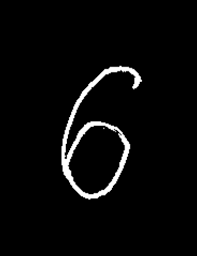

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
The Handwritten Image is Recognised as:  6


In [62]:
# Enter the path of Image
input_img_path = input("Enter the image path: ")

# Read the image entered
input_img = cv2.imread(input_img_path)

# Display the Image
cv2_imshow(input_img)

# Converting to Grayscale image
input_img_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

# Resizing the image
input_img_gray_resize = cv2.resize(input_img_gray, (28, 28))

# Normalization (Scaling the values to be in range of 0 - 1)
input_img_gray_resize_norm = input_img_gray_resize / 255.0

# Reshaping the image
input_img_gray_resize_norm_reshaped = np.reshape(input_img_gray_resize_norm, [1, 28, 28])

# Predicting the Image
input_pred = model_2.predict(input_img_gray_resize_norm_reshaped)

# Choosing the maximum value
input_pred_label = np.argmax(input_pred)
print("The Handwritten Image is Recognised as: ", input_pred_label)

Enter the image path: /content/MNIST_digit.png


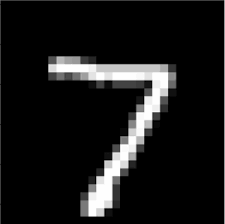

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
The Handwritten Image is Recognised as:  7


In [68]:
# Enter the path of Image
input_img_path = input("Enter the image path: ")

# Read the image entered
input_img = cv2.imread(input_img_path)

# Display the Image
cv2_imshow(input_img)

# Converting to Grayscale image
input_img_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

# Resizing the image
input_img_gray_resize = cv2.resize(input_img_gray, (28, 28))

# Normalization (Scaling the values to be in range of 0 - 1)
input_img_gray_resize_norm = input_img_gray_resize / 255.0

# Reshaping the image
input_img_gray_resize_norm_reshaped = np.reshape(input_img_gray_resize_norm, [1, 28, 28])

# Predicting the Image
input_pred = model_2.predict(input_img_gray_resize_norm_reshaped)

# Choosing the maximum value
input_pred_label = np.argmax(input_pred)
print("The Handwritten Image is Recognised as: ", input_pred_label)

Enter the image path: /content/MNIST_digit(5).jfif


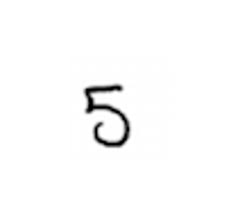

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
The Handwritten Image is Recognised as:  5


In [69]:
# Enter the path of Image
input_img_path = input("Enter the image path: ")

# Read the image entered
input_img = cv2.imread(input_img_path)

# Display the Image
cv2_imshow(input_img)  # For Colab users; use cv2.imshow() for local execution

# Convert the image to grayscale
input_img_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

# Resize the image to 28x28 pixels (same as the MNIST dataset)
input_img_gray_resize = cv2.resize(input_img_gray, (28, 28))

# Normalize pixel values (scaling to range 0 - 1)
input_img_gray_resize_norm = input_img_gray_resize / 255.0

# Reshape the image to match the model's expected input shape
input_img_gray_resize_norm_reshaped = np.reshape(input_img_gray_resize_norm, [1, 28, 28])

# Predict the digit in the image
input_pred = model_2.predict(input_img_gray_resize_norm_reshaped)

# Get the class label with the highest probability
input_pred_label = np.argmax(input_pred)
print("The Handwritten Image is Recognised as: ", input_pred_label)

Enter the image path: /content/MNIST_digit.png


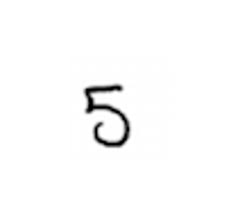

The Handwritten Image is Recognised as:  5


In [73]:
def predict_MNIST_Image_Handwritten(input_data):
    input_img = cv2.imread(input_data)

    # Display the Image
    cv2_imshow(input_img)

    # Converting to Grayscale image
    input_img_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

    # Resizing the image
    input_img_gray_resize = cv2.resize(input_img_gray, (28, 28))

    # Normalization (Scaling the values to be in range of 0 - 1)
    input_img_gray_resize_norm = input_img_gray_resize / 255.0

    # Reshaping the image
    input_img_gray_resize_norm_reshaped = np.reshape(input_img_gray_resize_norm, [1, 28, 28])

    # Predicting the Image
    input_pred = model_2.predict(input_img_gray_resize_norm_reshaped)


# Enter the path of Image
input_img_path = input("Enter the image path: ")

# Display the Image
cv2_imshow(input_img)


# Choosing the maximum value
input_pred_label = np.argmax(input_pred)
print("The Handwritten Image is Recognised as: ", input_pred_label)

Enter the image path: /content/MNIST_digit(six).jfif


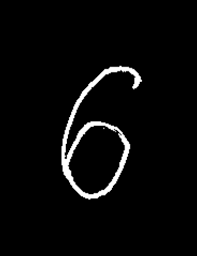

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
The Handwritten Image is Recognised as: 6


6

In [89]:
# Load the trained model
model = load_model("your_trained_model.h5")  # Ensure your model is saved and available

def predict_MNIST_Image_Handwritten(image_path):
    """
    Predicts a handwritten digit from an input image using a trained model.

    Parameters:
        image_path (str): The file path of the image to be processed.

    Returns:
        int: The predicted digit (0-9).
    """

    # Read the image
    input_img = cv2.imread(image_path)

    # Validate image loading
    if input_img is None:
        print("Error: Could not read the image. Check the file path.")
        return None

    # Display the image
    cv2_imshow(input_img)

    # Convert to grayscale
    input_img_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

    # Resize to 28x28 (same as MNIST dataset)
    input_img_gray_resize = cv2.resize(input_img_gray, (28, 28))

    # Normalize pixel values (scale between 0 and 1)
    input_img_gray_resize_norm = input_img_gray_resize / 255.0

    # Reshape to match model input shape (batch_size, height, width, channels)
    input_img_gray_resize_norm_reshaped = np.reshape(input_img_gray_resize_norm, (1, 28, 28, 1))

    # Make a prediction
    input_pred = model.predict(input_img_gray_resize_norm_reshaped)

    # Get the predicted digit (the index of the max value)
    input_pred_label = np.argmax(input_pred)

    print("The Handwritten Image is Recognised as:", input_pred_label)

    return input_pred_label

# Request user input for image path
input_img_path = input("Enter the image path: ")

# Predict and display the result
predict_MNIST_Image_Handwritten(input_img_path)


In [84]:
# Load the trained model
model_2 = load_model("your_trained_model.h5")  # Load the saved model, ensure you have a trained model

In [85]:
def predict_digit(img):
    """Preprocess image and predict the handwritten digit."""
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img_resized = cv2.resize(img_gray, (28, 28))      # Resize to 28x28 pixels
    img_normalized = img_resized / 255.0              # Normalize pixel values
    img_reshaped = img_normalized.reshape(1, 28, 28, 1)  # Reshape for the model

    prediction = model_2.predict(img_reshaped)  # Predict
    predicted_label = np.argmax(prediction)  # Get the class label

    return f"The handwritten digit is: {predicted_label}"

# Create Gradio interface
interface = gr.Interface(
    fn=predict_digit,
    inputs=gr.Image(type="numpy"),
    outputs="text",
    title="Handwritten Digit Recognition",
    description="Upload a handwritten digit image, and the model will recognize it."
)

# Launch the interface
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d10a571f9da867d1ed.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
